#YouTube trending videos analysis ⛵

YouTube is the world’s most popular and widely used video platform today.This is a project on YouTube trending videos analysis with Python.

The dataset that I will be using for the analysis of Youtube trending videos was collected over 205 days. For each of those days, the dataset contains data on trending videos for that day. It contains data on over 40,000 trending videos.

We will analyze the data to get insight on trending YouTube videos, to see what is common among all trending videos from US Region. This information can also be used by people who want to increase the popularity of their videos on YouTube.

Now let’s get started with the task of Youtube trending videos analysis with Python by importing the necessary Python libraries:

In [ ]:

%pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

Now let’s read the data and set a few configuration options just to improve visualization plots:

In [ ]:
df = pd.read_csv("Dataset\USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

#Data Exploration

The description column has some null values. These are some of the rows with null description values. So, to do some sort of data cleaning and to get rid of those null values, I’m going to put an empty string in place of each null value in the Description column:


In [35]:
df["description"] = df["description"].fillna(value="")

In [36]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


Observations from the above table:

1. The average number of views of a trending video is 2,360,784. The median value of the number of views is 681,861, which means that half of the trending videos have less than this number and the other half have views greater than this number.

2. The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.

3. The average number of comments is 8,446 while the median is 1,856.

#Data Visualization

Now we want to see how many trending video titles have at least one uppercase word (eg WHAT). To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word, and False otherwise:

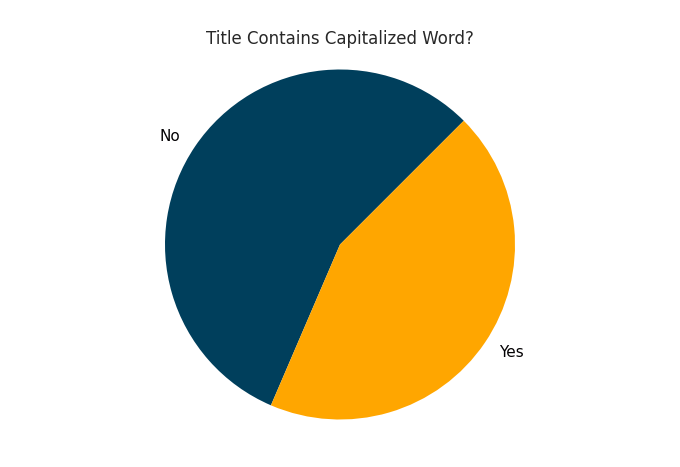

In [37]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

We can see that 44% of trending video titles contain at least one word in all caps. We will use our added variable later to analyze the correlation between the variables.

Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

<ipython-input-38-e6d651d6430c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


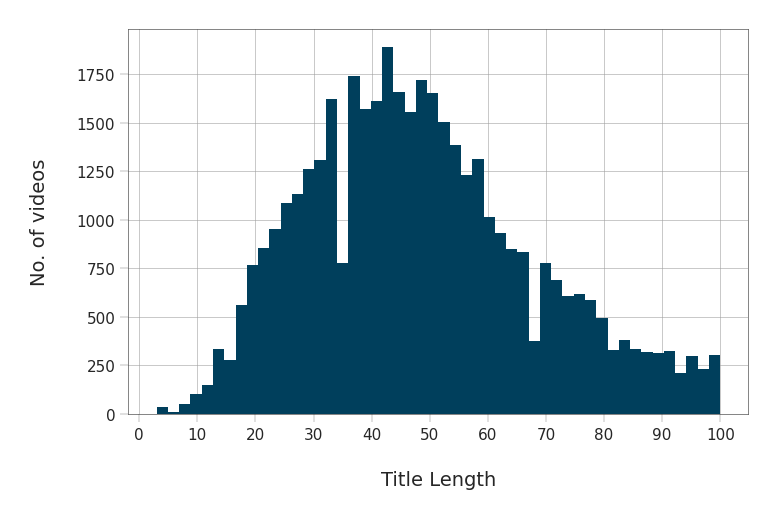

In [38]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that the videos title length distribution looks like a normal distribution, where most videos have a title length of around 30-60 characters. Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views:

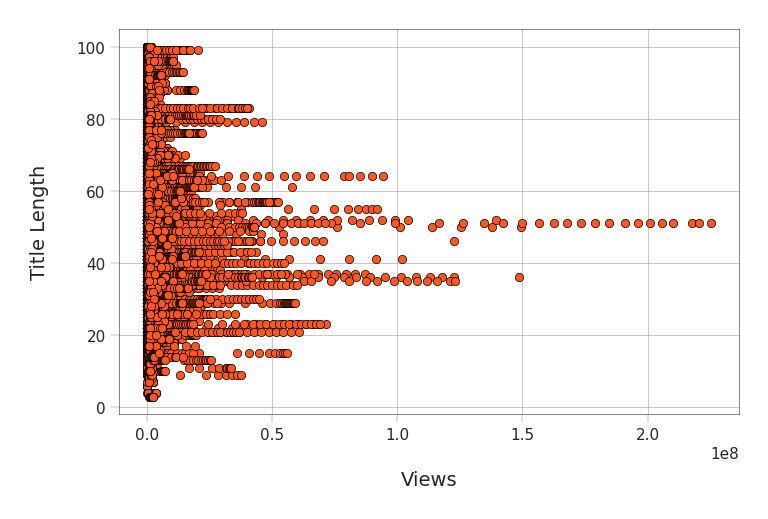

In [39]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 33 and 55 characters or so.

#Youtube Trending Videos Analysis: Correlation

Now let’s see how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate, meaning that views and likes increase and decrease together:

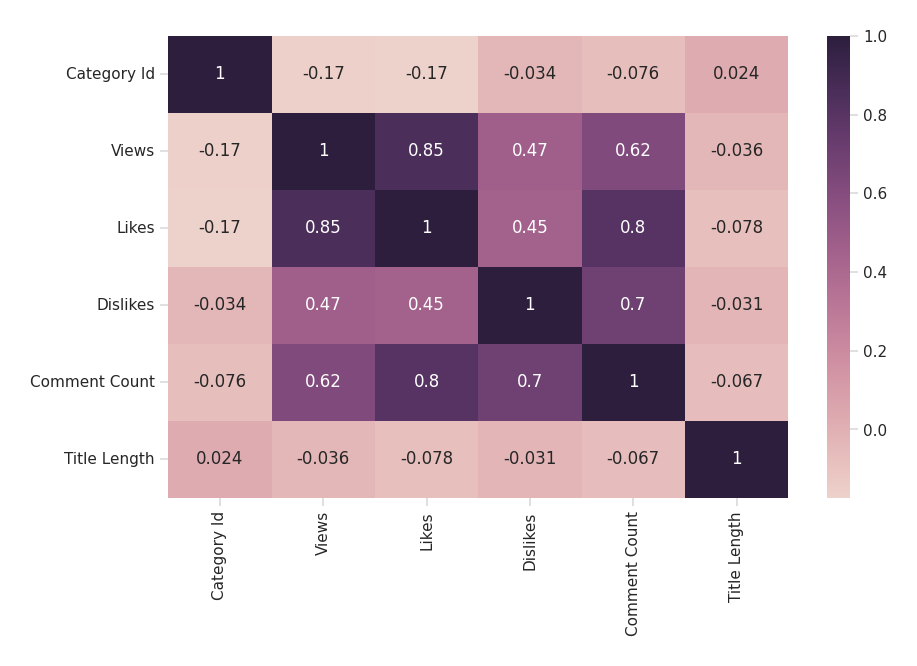

In [40]:
# Filter out non-numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])

h_labels = [x.replace('_', ' ').title() for x in
            list(numeric_df.columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(numeric_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above indicate that views and likes are strongly positively correlated.

Let’s see if some words are used meaningfully in trending video titles. Let’s draw a word cloud for the titles of our trending videos, which is a way to visualize the most common words in the titles; the more common the word, the larger its font-size:

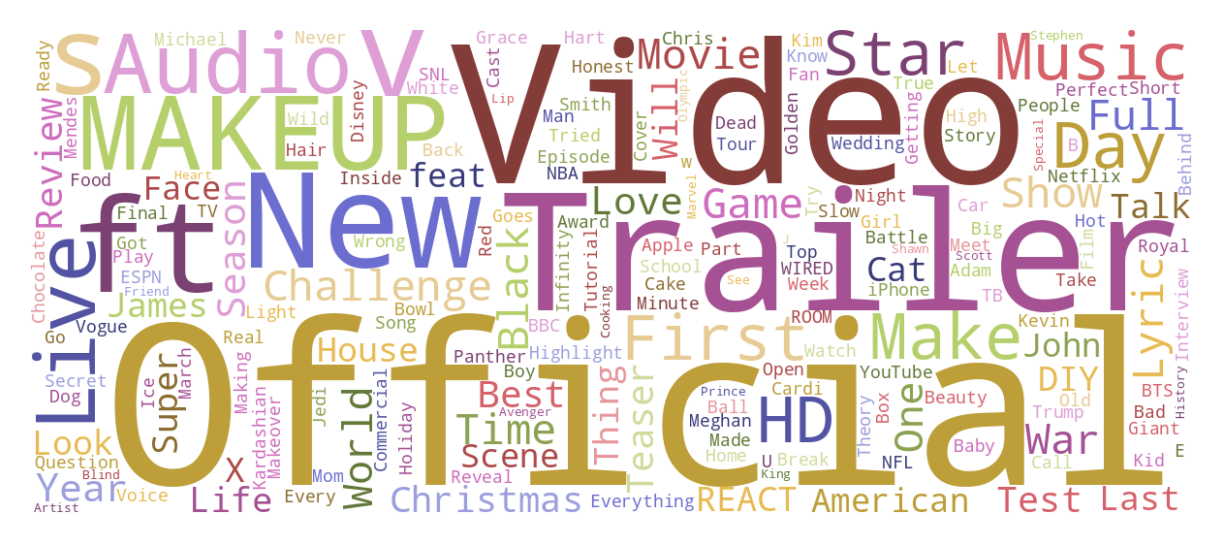

In [41]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#Engagement Metrics Analysis

First lets Calculate Engagement Rate


In [30]:
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views'] * 100

 Analyze Engagement by Category

In [31]:
category_engagement = df.groupby('category_id')['engagement_rate'].mean().sort_values(ascending=False)
print('Top Categories by Engagement Rate:')
print(category_engagement.head())


Top Categories by Engagement Rate:
category_id
10   5.27
26   5.22
23   5.06
29   4.92
22   4.87
Name: engagement_rate, dtype: float64


These engagement rate values show which YouTube categories have the highest audience interaction relative to views. Here's what each category ID represents:

10: Music (5.27% engagement rate) - The highest engagement, likely due to strong viewer interaction through likes, comments, and shares on music videos.

26: Howto & Style (5.22%) - High engagement suggests audiences interact well with tutorials and style-related content.

23: Comedy (5.06%) - Consistently strong engagement, likely due to shareability and viewer reactions.

29: Nonprofits & Activism (4.92%) - Shows meaningful interaction, possibly because of passionate audience responses to social causes.

22: People & Blogs (4.87%) - Indicates a good level of personal connection and interaction with vlog-style content.

<br>


---


<br>




Now Lets Analyze Engagement by Channel

In [32]:
channel_engagement = df.groupby('channel_title')['engagement_rate'].mean().sort_values(ascending=False)
print('\nTop Channels by Engagement Rate:')
print(channel_engagement.head())


Top Channels by Engagement Rate:
channel_title
Daily Caller      22.29
Desimpedidos      22.10
KickThePj         19.43
Amber Liu         18.94
HarryStylesVEVO   18.23
Name: engagement_rate, dtype: float64


The top channels by engagement rate show exceptionally high interaction with their audience:

Daily Caller (22.29%): High engagement, likely driven by strong reactions to news or opinion content.

Desimpedidos (22.10%): High engagement, possibly due to sports-related content that encourages active viewer interaction.

KickThePj (19.43%): Strong engagement, often seen in niche or creative content that resonates deeply with fans.

Amber Liu (18.94%): High interaction, likely from a dedicated fanbase of the artist.

HarryStylesVEVO (18.23%): Impressive engagement, typical for music channels with active fan communities.

<br>

---
<br>






Visualizing the top 10 categories and channels by engagement rate

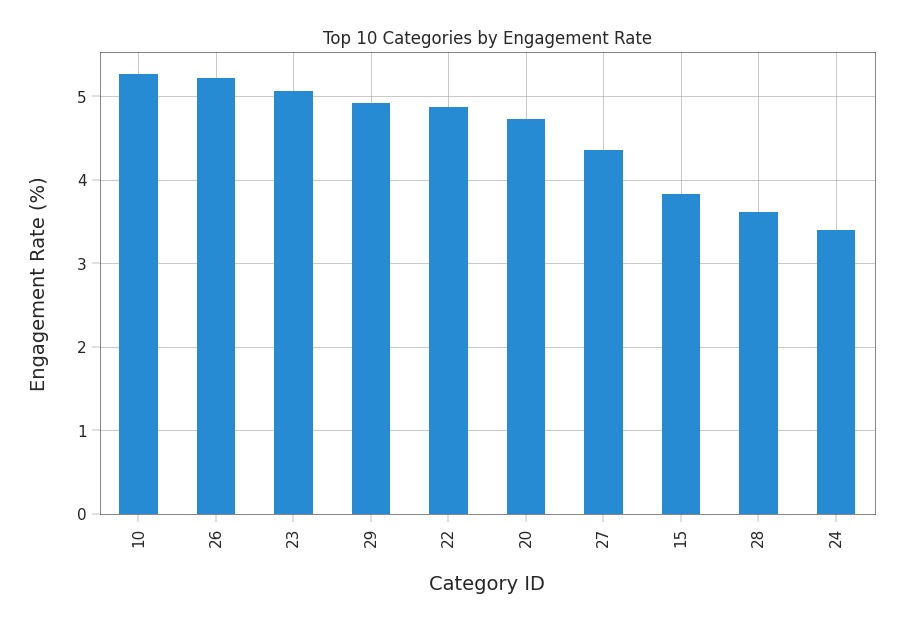

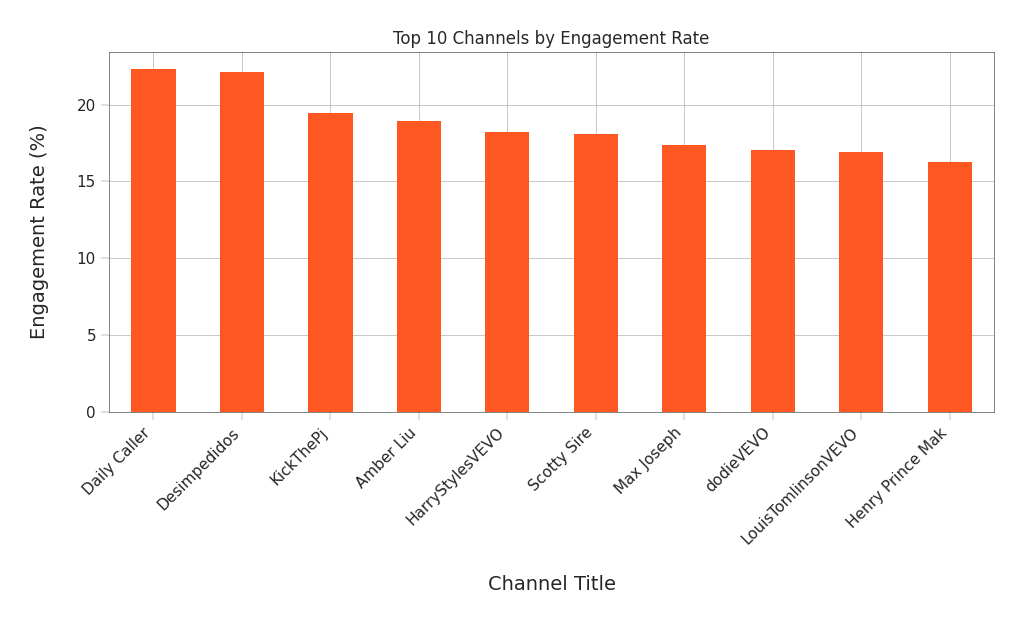

In [42]:
plt.figure(figsize=(10, 6))
category_engagement.head(10).plot(kind='bar', color='#268bd2')
plt.title('Top 10 Categories by Engagement Rate')
plt.xlabel('Category ID')
plt.ylabel('Engagement Rate (%)')
plt.show()

plt.figure(figsize=(10, 6))
channel_engagement.head(10).plot(kind='bar', color='#ff5722')
plt.title('Top 10 Channels by Engagement Rate')
plt.xlabel('Channel Title')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Thanks for visiting! :)
Author: Kandarp Joshi
